In [1]:
import pandas as pd

In [3]:
oo = pd.read_csv('practice/data/olympics.csv', skiprows=4)
oo.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


In [5]:
oo.groupby('Edition')

In [6]:
type(oo.groupby('Edition'))

pandas.core.groupby.generic.DataFrameGroupBy

In [7]:
list(oo.groupby('Edition'))

[(1896,
         City  Edition          Sport       Discipline  \
  0    Athens     1896       Aquatics         Swimming   
  1    Athens     1896       Aquatics         Swimming   
  2    Athens     1896       Aquatics         Swimming   
  3    Athens     1896       Aquatics         Swimming   
  4    Athens     1896       Aquatics         Swimming   
  ..      ...      ...            ...              ...   
  146  Athens     1896  Weightlifting    Weightlifting   
  147  Athens     1896  Weightlifting    Weightlifting   
  148  Athens     1896      Wrestling  Wrestling Gre-R   
  149  Athens     1896      Wrestling  Wrestling Gre-R   
  150  Athens     1896      Wrestling  Wrestling Gre-R   
  
                        Athlete  NOC Gender                        Event  \
  0               HAJOS, Alfred  HUN    Men               100m freestyle   
  1            HERSCHMANN, Otto  AUT    Men               100m freestyle   
  2           DRIVAS, Dimitrios  GRE    Men   100m freestyle for 

### Iterating through groups

In [8]:
for group_key, group_value in oo.groupby('Edition'):
    print(group_key)
    print(group_value)

1896
       City  Edition          Sport       Discipline  \
0    Athens     1896       Aquatics         Swimming   
1    Athens     1896       Aquatics         Swimming   
2    Athens     1896       Aquatics         Swimming   
3    Athens     1896       Aquatics         Swimming   
4    Athens     1896       Aquatics         Swimming   
..      ...      ...            ...              ...   
146  Athens     1896  Weightlifting    Weightlifting   
147  Athens     1896  Weightlifting    Weightlifting   
148  Athens     1896      Wrestling  Wrestling Gre-R   
149  Athens     1896      Wrestling  Wrestling Gre-R   
150  Athens     1896      Wrestling  Wrestling Gre-R   

                      Athlete  NOC Gender                        Event  \
0               HAJOS, Alfred  HUN    Men               100m freestyle   
1            HERSCHMANN, Otto  AUT    Men               100m freestyle   
2           DRIVAS, Dimitrios  GRE    Men   100m freestyle for sailors   
3          MALOKINIS, Ioan

In [9]:
type(group_value)

pandas.core.frame.DataFrame

# Groupby Computations

In [10]:
oo.groupby('Edition').size()

Edition
1896     151
1900     512
1904     470
1908     804
1912     885
1920    1298
1924     884
1928     710
1932     615
1936     875
1948     814
1952     889
1956     885
1960     882
1964    1010
1968    1031
1972    1185
1976    1305
1980    1387
1984    1459
1988    1546
1992    1705
1996    1859
2000    2015
2004    1998
2008    2042
dtype: int64

## agg([...])

In [12]:
oo.groupby(['Edition','NOC','Medal']).agg(['min','max','count'])

City                         Sport                 \
                        min      max count            min            max   
Edition NOC Medal                                                          
1896    AUS Gold     Athens   Athens     2      Athletics      Athletics   
        AUT Bronze   Athens   Athens     2        Cycling        Cycling   
            Gold     Athens   Athens     2       Aquatics        Cycling   
            Silver   Athens   Athens     1       Aquatics       Aquatics   
        DEN Bronze   Athens   Athens     3        Fencing       Shooting   
...                     ...      ...   ...            ...            ...   
2008    UZB Silver  Beijing  Beijing     2           Judo      Wrestling   
        VEN Bronze  Beijing  Beijing     1      Taekwondo      Taekwondo   
        VIE Silver  Beijing  Beijing     1  Weightlifting  Weightlifting   
        ZIM Gold    Beijing  Beijing     1       Aquatics       Aquatics   
            Silver  Beijing  Beijing     3       Aquatics       Aquatics   

                             Discipline                         \
                   count            min              max count   
Edition NOC Medal                                                
1896    AUS Gold       2      Athletics        Athletics     2   
        AUT Bronze     2  Cycling Track    Cycling Track     2   
            Gold       2  Cycling Track         Swimming     2   
            Silver     1       Swimming         Swimming     1   
        DEN Bronze     3        Fencing         Shooting     3   
...                  ...            ...              ...   ...   
2008    UZB Silver     2           Judo  Wrestling Free.     2   
        VEN Bronze     1      Taekwondo        Taekwondo     1   
        VIE Silver     1  Weightlifting    Weightlifting     1   
        ZIM Gold       1       Swimming         Swimming     1   
            Silver     3       Swimming         Swimming     3   

                                    Athlete  ...       Gender               \
                                        min  ... count    min    max count   
Edition NOC Medal                            ...                             
1896    AUS Gold               FLACK, Edwin  ...     2    Men    Men     2   
        AUT Bronze            SCHMAL, Adolf  ...     2    Men    Men     2   
            Gold              NEUMANN, Paul  ...     2    Men    Men     2   
            Silver         HERSCHMANN, Otto  ...     1    Men    Men     1   
        DEN Bronze            JENSEN, Viggo  ...     3    Men    Men     3   
...                                     ...  ...   ...    ...    ...   ...   
2008    UZB Silver        TANGRIEV, Abdullo  ...     2    Men    Men     2   
        VEN Bronze  CONTRERAS RIVERO, Dalia  ...     1  Women  Women     1   
        VIE Silver          HOANG, Anh Tuan  ...     1    Men    Men     1   
        ZIM Gold           COVENTRY, Kirsty  ...     1  Women  Women     1   
            Silver         COVENTRY, Kirsty  ...     3  Women  Women     3   

                                               Event  \
                                                 min   
Edition NOC Medal                                      
1896    AUS Gold                               1500m   
        AUT Bronze                              10km   
            Gold                        12-hour race   
            Silver                    100m freestyle   
        DEN Bronze  25m rapid fire pistol (60 shots)   
...                                              ...   
2008    UZB Silver             + 100kg (heavyweight)   
        VEN Bronze                           - 49 kg   
        VIE Silver      - 56kg, total (bantamweight)   
        ZIM Gold                     200m backstroke   
            Silver                   100m backstroke   

                                                       Event_gender            
                                             max count          min max cou

In [15]:
oo.groupby(['Edition','NOC','Medal']).size()

Edition  NOC  Medal 
1896     AUS  Gold      2
         AUT  Bronze    2
              Gold      2
              Silver    1
         DEN  Bronze    3
                       ..
2008     UZB  Silver    2
         VEN  Bronze    1
         VIE  Silver    1
         ZIM  Gold      1
              Silver    3
Length: 2356, dtype: int64

## agg({ : [...]})

In [17]:
oo.groupby(['Edition','NOC','Medal']).agg({'Edition':['min','max','count']})

Edition            
                       min   max count
Edition NOC Medal                     
1896    AUS Gold      1896  1896     2
        AUT Bronze    1896  1896     2
            Gold      1896  1896     2
            Silver    1896  1896     1
        DEN Bronze    1896  1896     3
...                    ...   ...   ...
2008    UZB Silver    2008  2008     2
        VEN Bronze    2008  2008     1
        VIE Silver    2008  2008     1
        ZIM Gold      2008  2008     1
            Silver    2008  2008     3

[2356 rows x 3 columns]

In [18]:
oo.loc[oo.Athlete == 'LEWIS, Carl'].groupby('Athlete').agg({'Edition' : ['min','max','count']})

Edition            
                min   max count
Athlete                        
LEWIS, Carl    1984  1996    10

### Challenge 4

Using groupby(), plot the total number of medals awarded at each of the Olympic games throughout history

<AxesSubplot:xlabel='Edition'>

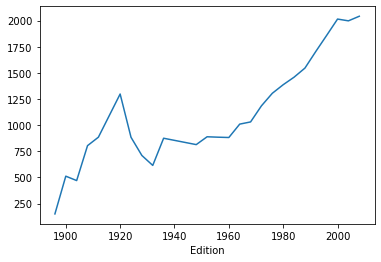

In [29]:
oo.groupby('Edition').size().plot()

Create a list showing the total number of medals won for each country over the history of the Olympics. For each country, include the year of the first and most recent Olympic medal wins

In [26]:
oo.groupby('NOC').agg({'Medal' : ['count','min','max']})

Medal                
    count     min     max
NOC                      
AFG     1  Bronze  Bronze
AHO     1  Silver  Silver
ALG    14  Bronze  Silver
ANZ    29  Bronze  Silver
ARG   239  Bronze  Silver
..    ...     ...     ...
VIE     2  Silver  Silver
YUG   435  Bronze  Silver
ZAM     2  Bronze  Silver
ZIM    23  Bronze  Silver
ZZX    48  Bronze  Silver

[138 rows x 3 columns]

### Challenge 5

In every Olympics, which US athlete has won the most total number of medals? Include the athlete's discipline.

In [55]:
gy = oo[oo.NOC == 'USA']
gy = gy.groupby(['Edition','Athlete','Medal']).size().unstack('Medal',fill_value=0)
gy['Total'] = gy['Gold'] + gy['Silver'] + gy['Bronze']
gy.reset_index(inplace=True)
tu = [group.sort_values('Total',ascending=False)[:1] for year, group in gy.groupby('Edition')]
tu
top = pd.DataFrame()
for i in tu:
    top = top.append(i)
top

Medal,Edition,Athlete,Bronze,Gold,Silver,Total
5,1896,"GARRETT, Robert",0,2,2,4
14,1900,"BAXTER, Irving",0,2,3,5
153,1904,"HEIDA, Anton",0,5,1,6
363,1908,"SHERIDAN, Martin",1,2,0,3
421,1912,"OSBURN, Carl Townsend",1,1,2,4
506,1920,"LEE, Willis",1,5,1,7
733,1924,"WEISSMULLER, Johnny",1,3,0,4
800,1928,"OSIPOWICH, Albina Lucy",0,2,0,2
859,1932,"DIDRIKSON, Mildred",0,2,1,3
1028,1936,"OWENS, Jesse",0,4,0,4
